In [77]:
import pandas as pd
import numpy as np

pd.set_option('display.max_column', None)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
# Load the data from csv file to the Pandas dataframe as
train_df = pd.read_csv('./train.csv', encoding = 'unicode_escape')
train_df.columns = [column.lower() for column in train_df.columns]

print(train_df.shape)
print(train_df.columns) 

(100000, 12)
Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [79]:
train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   passengerid  100000 non-null  int64  
 1   survived     100000 non-null  int64  
 2   pclass       100000 non-null  int64  
 3   name         100000 non-null  object 
 4   sex          100000 non-null  object 
 5   age          96708 non-null   float64
 6   sibsp        100000 non-null  int64  
 7   parch        100000 non-null  int64  
 8   ticket       95377 non-null   object 
 9   fare         99866 non-null   float64
 10  cabin        32134 non-null   object 
 11  embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


# Context

In [81]:
# 1. Check the %null values in data
# 2. Filling missing values

# Data quality assessment

In [82]:
# Check the %null values in data
res_1 = train_df.isnull().sum()/len(train_df)*100

res_1  # We can see that columns "age", "ticket", "fare", "cabin" and "embarked" have null values

passengerid     0.000
survived        0.000
pclass          0.000
name            0.000
sex             0.000
age             3.292
sibsp           0.000
parch           0.000
ticket          4.623
fare            0.134
cabin          67.866
embarked        0.250
dtype: float64

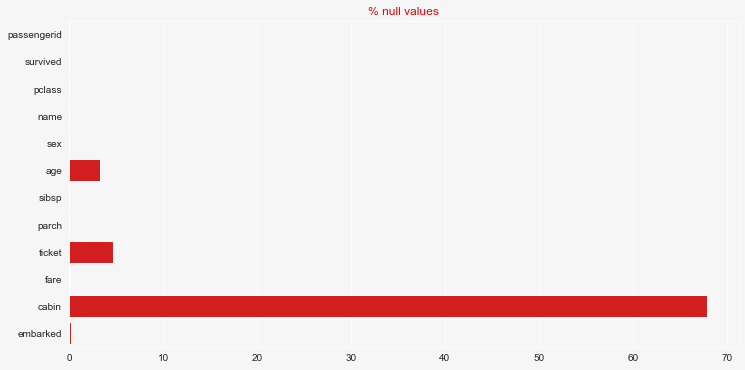

In [87]:
plt.figure(figsize = (12,6), facecolor='#f6f6f6')
sns.barplot(x = res_1.values, y = list(res_1.index), color = '#f00000')
plt.title('% null values', color = '#f00000')

ax = plt.gca()
ax.set_facecolor('#f6f6f6')

In [84]:
# Fill 'age' and 'fare' value with their mean value
for col in ['age', 'fare']:
    train_df[col] = train_df[col].fillna(train_df[col].mean())

# Fill 'embarked' and 'ticket' values with their mode value
for col in ['embarked', 'ticket']:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Filling 'cabin' values
# 67% values are missing here, so fill it with 1 if the value is present and 0 if the value is not present
col = 'cabin'
train_df[col] = train_df[col].notnull().astype(int)

# Verify there are no null values
train_df.isnull().sum()/len(train_df)*100

passengerid    0.0
survived       0.0
pclass         0.0
name           0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
ticket         0.0
fare           0.0
cabin          0.0
embarked       0.0
dtype: float64

# Data exploration

# Summary